In [208]:
# dataset 불러오기
import pandas as pd
import numpy as np
import matplotlib as plt
# jupyter에서 matplotlib의 결과를 아래 바로 보이게 하기 위해 %matplotlib inline을 입력합니다.
%matplotlib inline

# 다운로드 받은 데이터를 pandas의 dataframe형태로 읽어옵니다.
df = pd.read_csv("/media/ssd/projects/python/Aries/DataGenerator/performance.csv")
import datetime 
#df['timestamp_milli'] = df['timestamp_milli'].apply(lambda x: datetime.datetime.fromtimestamp(x/1000))
#df = df.set_index(['timestamp_milli']) 
#datetime.datetime.fromtimestamp(df['timestamp_milli'][0]/1000)
#df['timestamp_milli'] = datetime.datetime.fromtimestamp(df['timestamp_milli']/1000)
#df = df.set_index(['timestamp_milli'])

In [11]:
import plotly 
plotly.tools.set_credentials_file(username='JunsuLee', api_key='wujg1q9tbm')

In [44]:
df.dtypes

current_task_package            object
wakelock_power_mah             float64
sreclaimable                     int64
cpu_power_mah                  float64
level                            int64
cached                           int64
gpu_busy                         int64
total_power                    float64
timestamp_milli         datetime64[ns]
vfps_ratio                       int64
mobile_tx                        int64
adc_vts                          int64
memfree                          int64
wifi_rx                          int64
app_launch_time                  int64
sunreclaim                       int64
mobile_rx                        int64
wifi_tx                          int64
adc_pa_therm0                    int64
adc_pa_therm1                    int64
dtype: object

In [209]:
df['current_task_package'].value_counts()
df['current_task_package'] = df['current_task_package'].astype('category')
categories = df['current_task_package'].cat.categories
print categories

Index([u'android', u'com.android.chrome', u'com.android.contacts',
       u'com.android.incallui', u'com.android.mms', u'com.android.settings',
       u'com.android.systemui', u'com.buzzpia.aqua.launcher',
       u'com.facebook.katana', u'com.hyundaicard.appcard', u'com.kakao.story',
       u'com.kakao.talk', u'com.lge.ime', u'com.lge.lockscreensettings',
       u'com.socialapps.homeplus', u'kr.co.emart.emartmall',
       u'net.daum.android.webtoon', u'sixclk.newpiki'],
      dtype='object')


In [210]:
df['current_task_package'].unique()

[com.kakao.talk, com.android.systemui, com.buzzpia.aqua.launcher, com.kakao.story, com.android.chrome, ..., sixclk.newpiki, android, com.hyundaicard.appcard, kr.co.emart.emartmall, com.socialapps.homeplus]
Length: 18
Categories (18, object): [com.kakao.talk, com.android.systemui, com.buzzpia.aqua.launcher, com.kakao.story, ..., android, com.hyundaicard.appcard, kr.co.emart.emartmall, com.socialapps.homeplus]

In [211]:
package_count = df['current_task_package'].value_counts()
categories = package_count.index

In [212]:
from matplotlib import colors 
colors = colors.cnames.keys() 
colors = ['r','green','blue','y','darkorange','violet','deeppink','cyan','lime','chocolate','deepskyblue', 'gray']

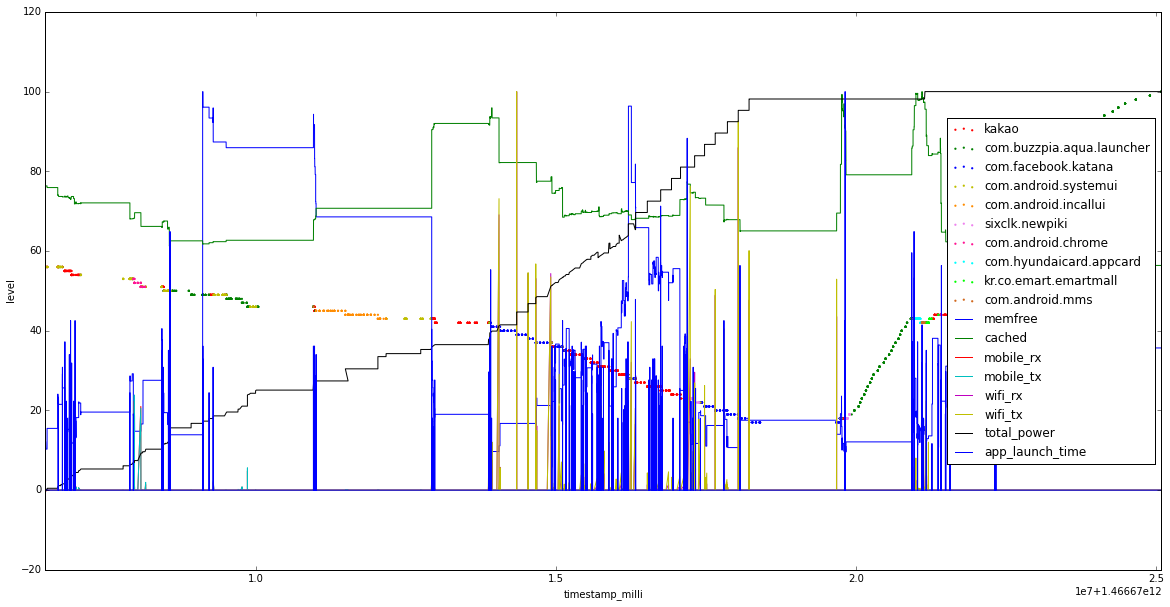

In [213]:
N = 10
ax = df[df['current_task_package']=='com.kakao.talk'].plot(kind='scatter', x='timestamp_milli', y='level', s=5, color=colors[0], label="kakao", edgecolor='None')
for index in range(1, N):
    category = categories[index]
    c = colors[index] 
    ax = df[df['current_task_package']==category].plot(figsize=(20,10), kind='scatter', x='timestamp_milli', y='level', s=5, color=c, label=category, edgecolor='None', ax=ax)
    
normalized_df.plot(kind='line', x='timestamp_milli', y='memfree', ax=ax)
normalized_df.plot(kind='line', x='timestamp_milli', y='cached', ax=ax)
normalized_df.plot(kind='line', x='timestamp_milli', y='mobile_rx', ax=ax)
normalized_df.plot(kind='line', x='timestamp_milli', y='mobile_tx', ax=ax)
normalized_df.plot(kind='line', x='timestamp_milli', y='wifi_rx', ax=ax)
normalized_df.plot(kind='line', x='timestamp_milli', y='wifi_tx', ax=ax)
normalized_df.plot(kind='line', x='timestamp_milli', y='total_power', ax=ax)
normalized_df.plot(kind='line', x='timestamp_milli', y='app_launch_time', ax=ax)
#df[df['current_task_package']=='com.android.chrome'].plot(figsize=(20,10), kind='scatter', x='timestamp_milli', y='level', color='g', label='chrome',edgecolor='None', ax=ax)
#df[df['current_task_package']=='com.buzzpia.aqua.launcher'].plot(figsize=(20,10), kind='scatter', x='timestamp_milli', y='level', color='y', label='buzz',edgecolor='None', ax=ax)

In [176]:
# min, max normalization 
def normalization(df, x, y):
    df_norm = (df - df.min()) / (df.max()-df.min()) 

    # range normalization [x, y] ex) [0, 100] 
    range = y - x
    normalized_df = (df_norm * range) + x
    return normalized_df

In [205]:
normalized_df = normalization(df[['app_launch_time','memfree','cached','mobile_rx','mobile_tx','wifi_tx','wifi_rx','total_power']],0,100)
normalized_df['timestamp_milli'] = df['timestamp_milli']
print normalized_df

      app_launch_time    memfree     cached   mobile_rx   mobile_tx  \
0                 0.0   0.000000   0.000000  100.000000  100.000000   
1                 0.0  12.193283  76.237303    0.000000    0.000000   
2                 0.0  12.193283  76.237303    0.002067    0.002547   
3                 0.0  11.111051  76.303625    0.000000    0.000000   
4                 0.0  11.111051  76.303625    0.016539    0.022925   
5                 0.0  10.303553  76.341524    0.000000    0.000000   
6                 0.0  10.303553  76.341524    0.000000    0.000000   
7                 0.0  10.303553  76.341524    0.016539    0.020378   
8                 0.0  10.303553  76.341524    0.000000    0.000000   
9                 0.0  10.303553  76.341524    0.000000    0.000000   
10                0.0  10.303553  76.341524    0.000000    0.000000   
11                0.0  10.303553  76.341524    0.000000    0.000000   
12                0.0  10.303553  76.341524    0.000000    0.000000   
13    

In [37]:
category_values = pd.DataFrame(columns=categories)
print category_values.columns
for category in category_values.columns:
    
'''
for category in categories:
    category_values[category] = df[df['current_task_package']==category] 
'''

Index([u'android', u'com.android.chrome', u'com.android.contacts',
       u'com.android.incallui', u'com.android.mms', u'com.android.settings',
       u'com.android.systemui', u'com.buzzpia.aqua.launcher',
       u'com.facebook.katana', u'com.hyundaicard.appcard', u'com.kakao.story',
       u'com.kakao.talk', u'com.lge.ime', u'com.lge.lockscreensettings',
       u'com.socialapps.homeplus', u'kr.co.emart.emartmall',
       u'net.daum.android.webtoon', u'sixclk.newpiki'],
      dtype='object')


"\nfor category in categories:\n    category_values[category] = df[df['current_task_package']==category] \n"

KeyError: "DatetimeIndex(['2016-06-23 19:08:02', '2016-06-23 19:08:03',\n               '2016-06-23 19:08:05', '2016-06-23 19:08:06',\n               '2016-06-23 19:08:06', '2016-06-23 19:08:06',\n               '2016-06-23 19:08:07', '2016-06-23 19:08:07',\n               '2016-06-23 19:08:08', '2016-06-23 19:08:08',\n               ...\n               '2016-06-23 23:32:04', '2016-06-23 23:32:04',\n               '2016-06-23 23:32:05', '2016-06-23 23:32:05',\n               '2016-06-23 23:32:05', '2016-06-23 23:32:05',\n               '2016-06-23 23:32:06', '2016-06-23 23:32:06',\n               '2016-06-23 23:32:06', '2016-06-23 23:32:12'],\n              dtype='datetime64[ns]', name=u'timestamp_milli', length=1208, freq=None) not in index"

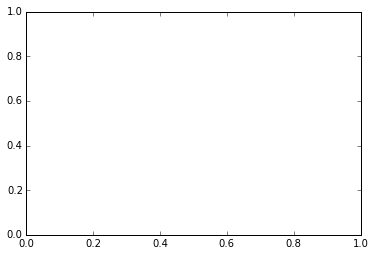

In [33]:
category_values['com.kakao.talk'].plot(kind='scatter', x=category_values['com.kakao.talk'].index, y='level')

In [22]:
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

data = []
for category, category_df in category_values.items():
    print category
    trace = go.Scatter(
        x = category_df.index,
        y = category_df['level'],
        mode = 'markers',
        name = category
    )
    data.append(trace)
py.iplot(data[0:10], filename='scatter-mode')
'''
N = 100
random_x = np.linspace(0, 1, N)
random_y0 = np.random.randn(N)+5
random_y1 = np.random.randn(N)
random_y2 = np.random.randn(N)-5

# Create traces
trace0 = go.Scatter(
    x = df.index,
    y = category_values['com.kakao.talk']['level'],
    mode = 'kakao',
    name = 'com.kakao.talk'
)
trace1 = go.Scatter(
    x = df.index,
    y = category_values['com.facebook.katana']['level'],
    mode = 'facebook',
    name = 'facebook'
)
trace2 = go.Scatter(
    x = df.index,
    y = category_values['com.android.chrome']['level'],
    mode = 'chrome',
    name = 'chrome'
)

data = [trace0, trace1, trace2]

py.iplot(data, filename='scatter-mode')
'''

com.kakao.talk
com.socialapps.homeplus
sixclk.newpiki
com.android.settings
com.android.chrome
com.android.mms
kr.co.emart.emartmall
net.daum.android.webtoon
com.android.incallui
com.facebook.katana
com.buzzpia.aqua.launcher
com.lge.lockscreensettings
com.android.systemui
android
com.hyundaicard.appcard
com.kakao.story
com.android.contacts
com.lge.ime
High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~JunsuLee/0 or inside your plot.ly account where it is named 'scatter-mode'


"\nN = 100\nrandom_x = np.linspace(0, 1, N)\nrandom_y0 = np.random.randn(N)+5\nrandom_y1 = np.random.randn(N)\nrandom_y2 = np.random.randn(N)-5\n\n# Create traces\ntrace0 = go.Scatter(\n    x = df.index,\n    y = category_values['com.kakao.talk']['level'],\n    mode = 'kakao',\n    name = 'com.kakao.talk'\n)\ntrace1 = go.Scatter(\n    x = df.index,\n    y = category_values['com.facebook.katana']['level'],\n    mode = 'facebook',\n    name = 'facebook'\n)\ntrace2 = go.Scatter(\n    x = df.index,\n    y = category_values['com.android.chrome']['level'],\n    mode = 'chrome',\n    name = 'chrome'\n)\n\ndata = [trace0, trace1, trace2]\n\npy.iplot(data, filename='scatter-mode')\n"